In [1]:
from utils import convert_boardtomatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses
import tensorflow as tf
import tensorflow.keras as keras



def filter_string(str_arr, regex): 
    p = re.compile(regex)
    return [ s for s in str_arr if p.match(s) ]

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
start_cols = filter_string(df.columns, 'start')
stop_cols = filter_string(df.columns, 'stop')

In [25]:
X = df[start_cols][:20000].to_numpy()
Y = df[stop_cols][:20000].to_numpy()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train = x_train.reshape([-1, 5, 125])
x_test = x_test.reshape([-1, 5, 125])
# x_train = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_train]).reshape([-1, 25, 25, 1])
# x_test = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_test]).reshape([-1, 25, 25, 1])

In [69]:
def build_CNN():
    model = models.Sequential()
#     model.add(layers.Input(shape=[5, 5, 5]))
    model.add(layers.LSTM(125, input_shape=[5, 125], return_sequences= True))
    model.add(layers.Reshape([25, 25, 1]))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(25, 25, 1)))
    model.add(layers.MaxPooling2D((3, 3)))
#     model.add(layers.Conv2D(32, (3, 3), activation='sigmoid'))
#     model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(625, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])
    return model

In [70]:
model = build_CNN()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 5, 125)            125500    
_________________________________________________________________
reshape_8 (Reshape)          (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 625)             

In [71]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
438/438 [==============================] - 7s 16ms/step - loss: 0.1234 - accuracy: 0.0026 - val_loss: 0.1183 - val_accuracy: 0.0017
Epoch 2/10
438/438 [==============================] - 7s 16ms/step - loss: 0.1170 - accuracy: 0.0011 - val_loss: 0.1173 - val_accuracy: 8.3333e-04
Epoch 3/10
438/438 [==============================] - 7s 16ms/step - loss: 0.1149 - accuracy: 0.0024 - val_loss: 0.1145 - val_accuracy: 0.0033
Epoch 4/10
438/438 [==============================] - 7s 15ms/step - loss: 0.1123 - accuracy: 0.0051 - val_loss: 0.1124 - val_accuracy: 0.0045
Epoch 5/10
438/438 [==============================] - 7s 15ms/step - loss: 0.1105 - accuracy: 0.0072 - val_loss: 0.1113 - val_accuracy: 0.0080
Epoch 6/10
438/438 [==============================] - 7s 16ms/step - loss: 0.1092 - accuracy: 0.0104 - val_loss: 0.1105 - val_accuracy: 0.0108
Epoch 7/10
438/438 [==============================] - 7s 15ms/step - loss: 0.1082 - accuracy: 0.0117 - val_loss: 0.1099 - val_accuracy: 0.

KeyboardInterrupt: 

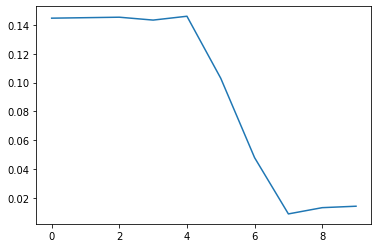

In [80]:
plt.plot(history.history['val_accuracy'])